## Kishor Yampalli

# Publisher Reviews On News

### "To analyze sentiment and measure similarity and Cluster them, aiming to understand public perceptions and evaluate the consistency of reporting among different publishers."


### Import data & Library

In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os 
os.chdir(r"C:\Users\LENOVO\Desktop\ML\ML project") #Location Path my laptop

In [3]:
data=pd.read_excel("Newsdata_Records.xlsx")
data.head()

,title,article_link,published_date,author,publisher,country,category,language,description
0,"Delhi ordinance bill can be stoppedâ€¦, INDIA ...",https://www.livemint.com/politics/news/delhi-o...,2023-08-03 06:01:00,NaN,Mint,India,Politics,English,Lok Sabha to consider and pass bill to replace...
1,Money bill vs normal bill: Govt refutes rumour...,https://www.livemint.com/politics/news/money-b...,2023-08-03 05:57:00,NaN,Mint,India,Politics,English,The Indian government is set to introduce the ...
2,US Presidential race: Vivek Ramaswamy alleges ...,https://www.livemint.com/politics/news/us-pres...,2023-08-03 02:59:00,NaN,Mint,India,Politics,English,Indian American presidential candidate Vivek R...
3,Uddhav Thackeray slams BJP for violence in Man...,https://www.livemint.com/politics/news/uddhav-...,2023-08-03 02:01:00,NaN,Mint,India,Politics,English,"â€œFirst in Manipur and now in Haryana, is thi..."
4,No-confidence motion: INDIA MPs request an ear...,https://www.livemint.com/politics/news/noconfi...,2023-08-03 01:26:00,NaN,Mint,India,Politics,English,Opposition parties request advanced schedule f...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           1111 non-null   object        
 1   article_link    1111 non-null   object        
 2   published_date  1111 non-null   datetime64[ns]
 3   author          141 non-null    object        
 4   publisher       1111 non-null   object        
 5   country         1111 non-null   object        
 6   category        1111 non-null   object        
 7   language        1111 non-null   object        
 8   description     1111 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 78.2+ KB


In [5]:
data=pd.DataFrame(data.description)

data.head()

,description
0,Lok Sabha to consider and pass bill to replace...
1,The Indian government is set to introduce the ...
2,Indian American presidential candidate Vivek R...
3,"â€œFirst in Manipur and now in Haryana, is thi..."
4,Opposition parties request advanced schedule f...


In [6]:
data.iloc[453,0]  # [row index , column index ]

'Union Women and Child Development Minister Smriti Irani has condemned the horrific incident showcased in a viral video where two women are paraded naked by a mob and then gangraped. Irani called the incident \'condemnable and downright inhuman\' and informed that she had spoken to Manipur CM N Biren Singh.“The horrific video of sexual assault of 2 women emanating from Manipur is condemnable and downright inhuman. Spoke to CM @NBirenSingh ji who has informed me that investigation is currently underway & assured that no effort will be spared to bring perpetrators to justice." Union Minister Smriti Irani tweeted on Wendesday.An official response from the Manipur Police on the viral video was in a press note issued by the Superintendent of Police (SP) K Meghachandra Singh. As per the press note, a case has been registered under charges of abduction, gangrape and murder at the Nongpok Semai Police Station of the Thoubal district against unknown miscreants. It further noted that an investig

# Data Cleaning or Pre-Processing

# Step 1 :- Lower case

In [7]:
data.description=data.description.str.lower()

In [8]:
data.iloc[453,0]

'union women and child development minister smriti irani has condemned the horrific incident showcased in a viral video where two women are paraded naked by a mob and then gangraped. irani called the incident \'condemnable and downright inhuman\' and informed that she had spoken to manipur cm n biren singh.“the horrific video of sexual assault of 2 women emanating from manipur is condemnable and downright inhuman. spoke to cm @nbirensingh ji who has informed me that investigation is currently underway & assured that no effort will be spared to bring perpetrators to justice." union minister smriti irani tweeted on wendesday.an official response from the manipur police on the viral video was in a press note issued by the superintendent of police (sp) k meghachandra singh. as per the press note, a case has been registered under charges of abduction, gangrape and murder at the nongpok semai police station of the thoubal district against unknown miscreants. it further noted that an investig

* Here we convert the data into Lower Case to reduce the size of the vocabulary of the text.

# Remove url

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [9]:
data.description = data.description.str.replace(r'http\S+|www.\S+','',case=False)  # | = or 
data.iloc[453,0]

'union women and child development minister smriti irani has condemned the horrific incident showcased in a viral video where two women are paraded naked by a mob and then gangraped. irani called the incident \'condemnable and downright inhuman\' and informed that she had spoken to manipur cm n biren singh.“the horrific video of sexual assault of 2 women emanating from manipur is condemnable and downright inhuman. spoke to cm @nbirensingh ji who has informed me that investigation is currently underway & assured that no effort will be spared to bring perpetrators to justice." union minister smriti irani tweeted on wendesday.an official response from the manipur police on the viral video was in a press note issued by the superintendent of police (sp) k meghachandra singh. as per the press note, a case has been registered under charges of abduction, gangrape and murder at the nongpok semai police station of the thoubal district against unknown miscreants. it further noted that an investig

* We remove url links from the data

# Step 2 :- Punctuation

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punctuation(abc):
    description_nopunt="".join([c  
                         for c in abc
                         if c not in string.punctuation])
    return description_nopunt

In [12]:
import pandas as pd
import string

# Define a function to remove punctuation
def remove_punctuation(text):
    if isinstance(text, str):  # Check if the value is a string
        return "".join([c for c in text if c not in string.punctuation])
    else:
        return text  # Return non-string values as-is

# Assuming 'data' is your DataFrame, you can use the 'applymap' function to apply the remove_punctuation function to all elements in the DataFrame
data['description'] = data['description'].apply(lambda x: remove_punctuation(x))

In [13]:
data.description=data.description.apply(lambda x : remove_punctuation(x)) # Text = x

In [14]:
data.iloc[453,0]

'union women and child development minister smriti irani has condemned the horrific incident showcased in a viral video where two women are paraded naked by a mob and then gangraped irani called the incident condemnable and downright inhuman and informed that she had spoken to manipur cm n biren singh“the horrific video of sexual assault of 2 women emanating from manipur is condemnable and downright inhuman spoke to cm nbirensingh ji who has informed me that investigation is currently underway  assured that no effort will be spared to bring perpetrators to justice union minister smriti irani tweeted on wendesdayan official response from the manipur police on the viral video was in a press note issued by the superintendent of police sp k meghachandra singh as per the press note a case has been registered under charges of abduction gangrape and murder at the nongpok semai police station of the thoubal district against unknown miscreants it further noted that an investigation has started 

* We remove punctuations so that we don't have different forms of the same words by using the above code.

# Remove Number

In [15]:
data.iloc[398,0]

'rajasthan chief minister ashok gehlot on thursday mounted an attack on the bjp over the situation in manipur saying the entire country is worried about it tension mounted in the hills of manipur after a may 4 video surfaced on wednesday showing two women from one of the warring communities being paraded naked by a few men from the other side the alleged mastermind was arrested on thursday it is very sad that the violence in manipur is not stopping the entire country is worried about this due to the negligence of the bjp 142 people have died in manipur so far gahlot said in a tweet he said nothing is more important than the safety of women for his government comparing the action taken by the rajasthan police in the jodhpur dalit girl gangrape case with the alleged parading naked incident in manipur gehlot tweeted after the gruesome gang rape in jodhpur the three accused were arrested in just two hours on the other hand it took 77 days for the bjp to nab just one '

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [16]:
data['description'] = data['description'].str.replace('\d+','')  # data.DESCRIPTION  or data['DESCRIPTION']

In [17]:
data.iloc[398,0]

'rajasthan chief minister ashok gehlot on thursday mounted an attack on the bjp over the situation in manipur saying the entire country is worried about it tension mounted in the hills of manipur after a may  video surfaced on wednesday showing two women from one of the warring communities being paraded naked by a few men from the other side the alleged mastermind was arrested on thursday it is very sad that the violence in manipur is not stopping the entire country is worried about this due to the negligence of the bjp  people have died in manipur so far gahlot said in a tweet he said nothing is more important than the safety of women for his government comparing the action taken by the rajasthan police in the jodhpur dalit girl gangrape case with the alleged parading naked incident in manipur gehlot tweeted after the gruesome gang rape in jodhpur the three accused were arrested in just two hours on the other hand it took  days for the bjp to nab just one '

* Here we remove the numbers from the description.

# Removing Stop Words

In [18]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
data.iloc[453,0]

'union women and child development minister smriti irani has condemned the horrific incident showcased in a viral video where two women are paraded naked by a mob and then gangraped irani called the incident condemnable and downright inhuman and informed that she had spoken to manipur cm n biren singh“the horrific video of sexual assault of  women emanating from manipur is condemnable and downright inhuman spoke to cm nbirensingh ji who has informed me that investigation is currently underway  assured that no effort will be spared to bring perpetrators to justice union minister smriti irani tweeted on wendesdayan official response from the manipur police on the viral video was in a press note issued by the superintendent of police sp k meghachandra singh as per the press note a case has been registered under charges of abduction gangrape and murder at the nongpok semai police station of the thoubal district against unknown miscreants it further noted that an investigation has started a

In [20]:
# Assuming you have already defined the clean_description_round2 function

# Check for missing values in the 'description' column and handle them
data['description'] = data['description'].fillna("")

data['description'] = data['description'].apply(lambda x: ' '.join([abc    # x = DESCRIPTION
                                                                    for abc in x.split()  # word tokenizer
                                                                    if abc not in stop]))


In [21]:
data.iloc[453,0]

'union women child development minister smriti irani condemned horrific incident showcased viral video two women paraded naked mob gangraped irani called incident condemnable downright inhuman informed spoken manipur cm n biren singh“the horrific video sexual assault women emanating manipur condemnable downright inhuman spoke cm nbirensingh ji informed investigation currently underway assured effort spared bring perpetrators justice union minister smriti irani tweeted wendesdayan official response manipur police viral video press note issued superintendent police sp k meghachandra singh per press note case registered charges abduction gangrape murder nongpok semai police station thoubal district unknown miscreants noted investigation started state police making allout effort arrest culprits'

* Removing Stopwords are the words that do not contribute to the maning of a sentence,so they can removed safely without causing any changes.

# Common Words

* manually created as per the case study

In [22]:
data.iloc[453,0]

'union women child development minister smriti irani condemned horrific incident showcased viral video two women paraded naked mob gangraped irani called incident condemnable downright inhuman informed spoken manipur cm n biren singh“the horrific video sexual assault women emanating manipur condemnable downright inhuman spoke cm nbirensingh ji informed investigation currently underway assured effort spared bring perpetrators justice union minister smriti irani tweeted wendesdayan official response manipur police viral video press note issued superintendent police sp k meghachandra singh per press note case registered charges abduction gangrape murder nongpok semai police station thoubal district unknown miscreants noted investigation started state police making allout effort arrest culprits'

In [23]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'Antarctogaean',
 'Hetaerist',
 'Scandinavianism',
 'magisterialness',
 'trihydrated',
 'digitinerved',
 'pokeout',
 'stampedingly',
 'bozo',
 'bisectionally',
 'autosuggestibility',
 'hygrometric',
 'pseudochina',
 'nonvisaed',
 'triarticulate',
 'sterelminthous',
 'unbastinadoed',
 'laterinerved',
 'estruation',
 'agraphic',
 'cacumination',
 'airwayman',
 'follicular',
 'Pueraria',
 'meliorant',
 'unexpanding',
 'zipping',
 'apoplectiform',
 'ovicapsule',
 'evangelization',
 'ascending',
 'projicient',
 'drunkard',
 'aerodonetic',
 'eloquence',
 'splanchnotomy',
 'Philohela',
 'litigable',
 'pedrail',
 'catarrhed',
 'seech',
 'inchoation',
 'padre',
 'emigrate',
 'mutuary',
 'stoppableness',
 'undisputatiously',
 'Forestiera',
 'noncommunicable',
 'hurr',
 'haunter',
 'smudgily',
 'heroify',
 'untress',
 'bantay',
 'stonishment',
 'Carida',
 'polypragmon',
 'uncontrovertibly',
 'barterer',
 'ehlite',
 'kevalin',
 'passulate',
 'mustermaster',
 'carnivorous',
 'oxytylote',
 'darkish

In [24]:

#  other code and function definitions here...

def clean_description_round2(description):
    '''Get rid of some additional punctuation and non-sensical description that was missed the first time around.'''
    if not isinstance(description, str):
        # If the description is not a string, return an empty string or handle it accordingly.
        return ""

    words = set(nltk.corpus.words.words())
    description = re.sub(r"\b[a-zA-Z]\b", "", description)  # Remove single alphabets like 'a' or 's'
    description = re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", description)  # Remove two-letter alphabets like 'ab' or 'ad'
    description = " ".join(w for w in nltk.wordpunct_tokenize(description) if w.lower() in words)
    
    return description

# Now apply the function to the data['description'] column:
data['description'] = data['description'].apply(lambda x: clean_description_round2(x))


In [25]:
data.iloc[453,0]

'union child development minister smriti condemned horrific incident viral video two naked mob incident condemnable downright inhuman informed spoken singh the horrific video sexual assault condemnable downright inhuman spoke informed investigation currently underway assured effort bring justice union minister smriti official response police viral video press note superintendent police singh per press note case registered abduction murder police station district unknown noted investigation state police making effort arrest'

* Here we remove single or two letters words which are meaning less by using nltk.corpus.words.words (corpus) this also helps to remove the common words.

# Lemmatization

In [26]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
def lemmatize_description(description):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(description)]

In [28]:
data.iloc[453,0]

'union child development minister smriti condemned horrific incident viral video two naked mob incident condemnable downright inhuman informed spoken singh the horrific video sexual assault condemnable downright inhuman spoke informed investigation currently underway assured effort bring justice union minister smriti official response police viral video press note superintendent police singh per press note case registered abduction murder police station district unknown noted investigation state police making effort arrest'

In [29]:
data.description = data.description.apply(lambda x :' '.join(lemmatize_description(x)))
data.iloc[453,0]

'union child development minister smriti condemn horrific incident viral video two naked mob incident condemnable downright inhuman inform speak singh the horrific video sexual assault condemnable downright inhuman speak inform investigation currently underway assure effort bring justice union minister smriti official response police viral video press note superintendent police singh per press note case register abduction murder police station district unknown note investigation state police make effort arrest'

* Here we do Lemmatization,it converts a word to its root from.

# Strip extra whitespace

In [30]:
data.iloc[453,0]

'union child development minister smriti condemn horrific incident viral video two naked mob incident condemnable downright inhuman inform speak singh the horrific video sexual assault condemnable downright inhuman speak inform investigation currently underway assure effort bring justice union minister smriti official response police viral video press note superintendent police singh per press note case register abduction murder police station district unknown note investigation state police make effort arrest'

In [31]:
data['description'] = (data['description'].astype("str").str.rstrip())
data.iloc[453,0]

'union child development minister smriti condemn horrific incident viral video two naked mob incident condemnable downright inhuman inform speak singh the horrific video sexual assault condemnable downright inhuman speak inform investigation currently underway assure effort bring justice union minister smriti official response police viral video press note superintendent police singh per press note case register abduction murder police station district unknown note investigation state police make effort arrest'

In [32]:
data.head()

,description
0,consider pass bill replace ordinance oppositio...
1,government set introduce digital personal data...
2,presidential candidate government truth involv...
3,ram say attack
4,opposition request advance schedule debate wan...


* Here we remove the whitespace of the text.

###  Finished Data Cleaning

# Term Document Matrix

In [33]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # BACK UP
data_cv = cv.fit_transform(data.description)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110
aam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbreviation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abduction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,1102,1103,1104,1105,1106,1107,1108,1109,1110,freq
aam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abbas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
abbreviation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abduction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [35]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,1102,1103,1104,1105,1106,1107,1108,1109,1110,freq
0,aam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43
1,abandon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,abbas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,abbreviation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,abduction,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


* Here we check the most frequent word in data by using Term Document Matrix.

In [36]:
tdm1=tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(20)

,Word,freq
3131,say,1005
2561,party,750
2255,minister,723
749,congress,691
3398,state,611
1604,government,549
2479,opposition,536
2213,meet,468
585,chief,467
2055,leader,318


* Here we do value count of most important word in data and sort them by descending order.

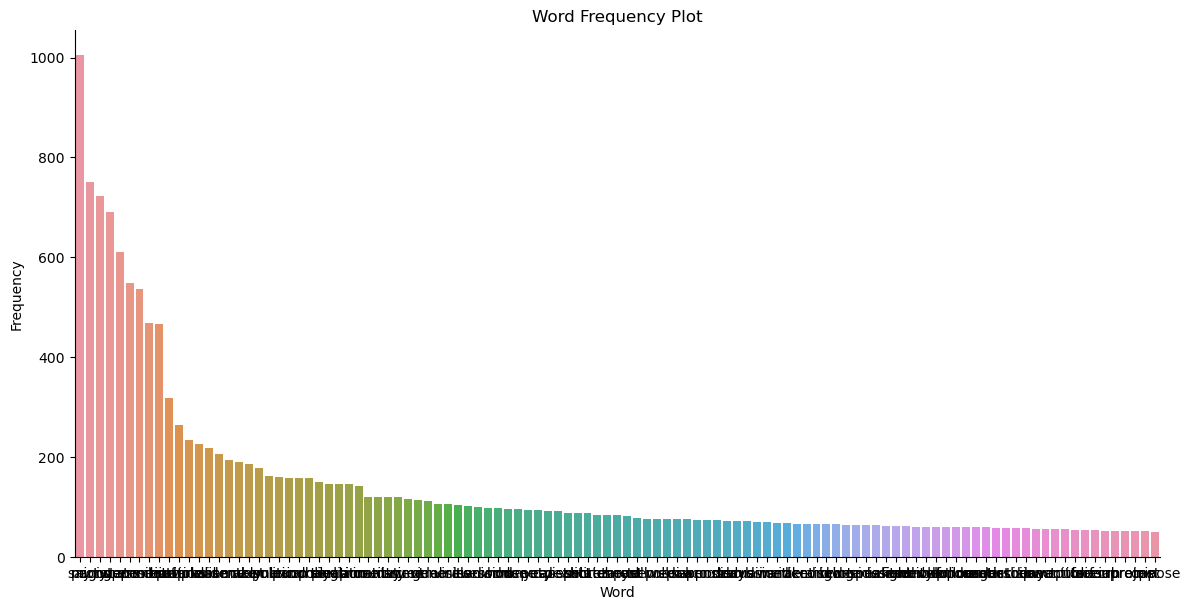

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

w = tdm1[tdm1['freq'] >= 50] 
fg = sns.catplot(x='Word', y='freq',
                 kind='bar', 
                 data=w, height=6, aspect=2)

# If you want to set the axis labels and title:
fg.set_axis_labels("Word", "Frequency")
plt.title("Word Frequency Plot")

# Show the plot
plt.show()


* We can see the word say, party, minister, congress are the most frequent Word in the data 

# Word Cloud 

In [38]:
description= " ".join(review for review in data.description)
print ("There are {} words in the combination of all review.".format(len(description)))

There are 291628 words in the combination of all review.


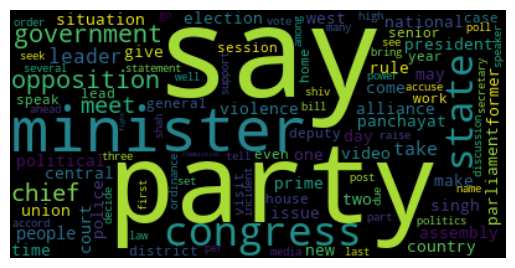

In [39]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
cloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="black",
                      collocations=False,
                      max_words=100).generate(description)

# Display the generated image:
# the matplotlib way:
plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

* The Publishers are walking more about the minister & congress party.

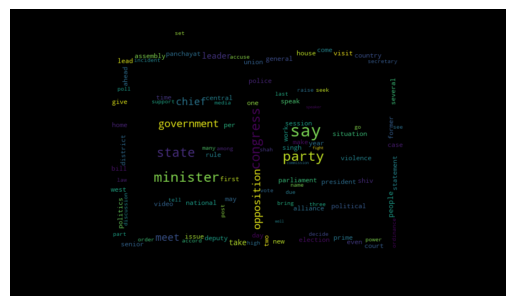

In [40]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("news1.jpg")) # shape & colour
# Generate a word cloud image
abc = WordCloud(stopwords=stopwords,
                      background_color="black",
                      collocations=False,
                      mask=mask,
                      mode="RGBA",
                      max_words=100).generate(description)

# Display the generated image:
# the matplotlib way:
image_colors = ImageColorGenerator(mask)
plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Assuming you have a function named 'data()' that returns your dataset as a DataFrame
data_cvr = data.copy()

# Initialize the CountVectorizer
bow_converter = CountVectorizer()

# Convert all documents to bag-of-words representation
bow_matrix = bow_converter.fit_transform(data_cvr['description'])

# Compute the similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(bow_matrix)

# Assuming you have a specific document index 'doc_index' for which you want to get the similarities
doc_index = 0  # Replace 0 with the desired document index
similarities = similarity_matrix[doc_index]

# Now, you can add the computed similarity values to your DataFrame
data['Similarity'] = similarities

# Now you can continue using your DataFrame 'data_cvr' with the added 'Similarity' column
data[:5]

,description,Similarity
0,consider pass bill replace ordinance oppositio...,1.000000
1,government set introduce digital personal data...,0.226134
2,presidential candidate government truth involv...,0.000000
3,ram say attack,0.000000
4,opposition request advance schedule debate wan...,0.125000


* Here we check the similarity,Cosine similarity measures the cosine of the angle between two vectors and is often used to determine how similar two documents

# Sentiment Analysis 

In [42]:
data = data.drop_duplicates('description') 
data

,description,Similarity
0,consider pass bill replace ordinance oppositio...,1.000000
1,government set introduce digital personal data...,0.226134
2,presidential candidate government truth involv...,0.000000
3,ram say attack,0.000000
4,opposition request advance schedule debate wan...,0.125000
...,...,...
1106,leader former chief minister ram thakur pendin...,0.038808
1107,two unidentified around gold elderly man front...,0.000000
1108,economic wing crime branch bust various illega...,0.000000
1109,crisis entry distress shiv,0.000000


In [43]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
data['polarity'] = data['description'].apply(pol)
data.head(5)

,description,Similarity,polarity
0,consider pass bill replace ordinance oppositio...,1.000000,0.0
1,government set introduce digital personal data...,0.226134,0.0
2,presidential candidate government truth involv...,0.000000,0.0
3,ram say attack,0.000000,0.0
4,opposition request advance schedule debate wan...,0.125000,0.0


In [44]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,description,Similarity,polarity,Sentiment
0,consider pass bill replace ordinance oppositio...,1.000000,0.0,Positive
1,government set introduce digital personal data...,0.226134,0.0,Positive
2,presidential candidate government truth involv...,0.000000,0.0,Positive
3,ram say attack,0.000000,0.0,Positive
4,opposition request advance schedule debate wan...,0.125000,0.0,Positive


<Axes: >

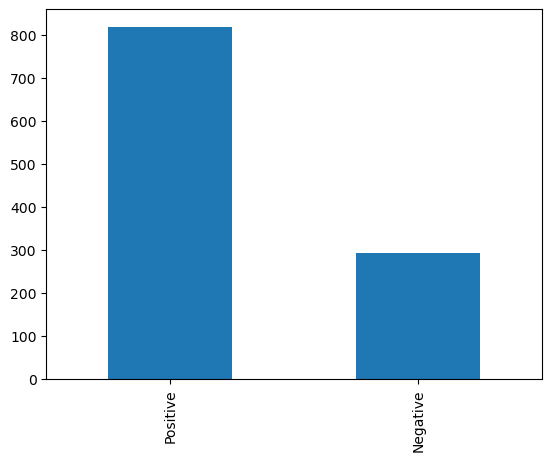

In [45]:
data.Sentiment.value_counts().plot.bar()

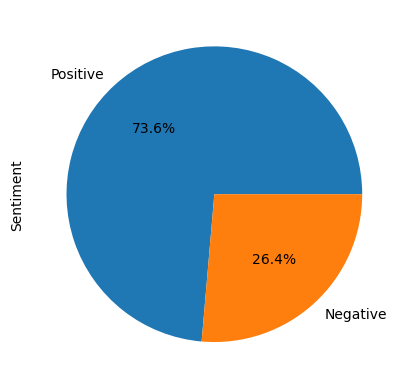

In [46]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");

* By Sentiment analysis we can able to know which publisher is talking positive and which is talking about negtive about the news. Here we can see there are 73% Positive news and 26% Negative news in dataset.

In [47]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def preprocess(text):
    # Implement your text preprocessing steps here (e.g., tokenization, removing stopwords, lowercasing).
    # For simplicity in this example, let's just convert the text to lowercase.
    return text.lower()

# Sample news data in a pandas DataFrame

data['description']

# Preprocess the news descriptions
data['preprocessed_description'] = data['description'].apply(preprocess)

# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['preprocessed_description'])

# Compute pairwise cosine similarity between all descriptions
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print the cosine similarity matrix
print(cosine_similarities)


[[1.         0.17022607 0.         ... 0.         0.         0.        ]
 [0.17022607 1.         0.01712586 ... 0.         0.         0.        ]
 [0.         0.01712586 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


* Here wee see cosine similarity matrix, which represents how similar each pair of news descriptions is to each other based on their TF-IDF vectors. 

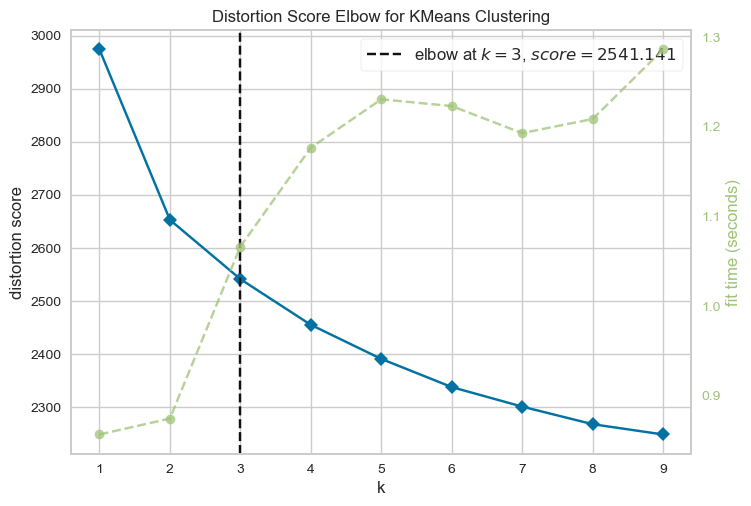

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10))
visualizer.fit(cosine_similarities)        # Fit the data to the visualizer
visualizer.show()

* Here we plot a eblow chart to know the number of clusters.

In [49]:
import pandas as pd
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(cosine_similarities)
clusters

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
print(clusters[:10])

[1 1 1 1 1 1 1 1 1 0]


### Convert Clusters into dataframe

In [51]:
output=clusters
df=pd.DataFrame(output,columns = ['clusters'])
df

,clusters
0,1
1,1
2,1
3,1
4,1
...,...
1106,0
1107,1
1108,1
1109,1


* Here we do clustering to make groups of publisher topic-wise.

# Finish